In [1]:

# --- Import necessary libraries for data processing, modeling, and visualization

# --- Hybrid Model using Averaging for Regression (Delay) ---
# --- Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.metrics import mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt


In [2]:
# Load dataset
# Load the dataset and remove unnecessary columns

df = pd.read_csv("dataset.csv")
df = df.drop(columns=['Unnamed: 0'])

# Define features (X) and target (y)
# Define features and target variable for (Delay) prediction
X = df.drop('delay', axis=1)
y = df['delay']


In [3]:
# Split into training and testing
# Split data into training and testing sets with 80/20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
# Initialize individual models for ensemble averaging

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
catboost_model = CatBoostRegressor(verbose=0, random_state=42)

In [4]:
# Train models
# Train each model separately on the training set

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

In [5]:
# Predict with each model
# Generate predictions from each model separately

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
catboost_preds = catboost_model.predict(X_test)


In [6]:
# Average predictions
hybrid_preds = (rf_preds + xgb_preds + catboost_preds) / 3

# Evaluate the Hybrid model
# Evaluate hybrid model using RMSE and R² metrics

mse = mean_squared_error(y_test, hybrid_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, hybrid_preds)

print(f"Hybrid Model - Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Hybrid Model - R-squared (R²) score: {r2:.4f}")


Hybrid Model - Root Mean Squared Error (RMSE): 5.1422
Hybrid Model - R-squared (R²) score: 0.9746


In [7]:
# Calculate additional evaluation metrics: MAE and explained variance

mae = mean_absolute_error(y_test, hybrid_preds)
explained_var = explained_variance_score(y_test, hybrid_preds)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Explained Variance Score: {explained_var:.4f}")

Mean Absolute Error (MAE): 0.5416
Explained Variance Score: 0.9746


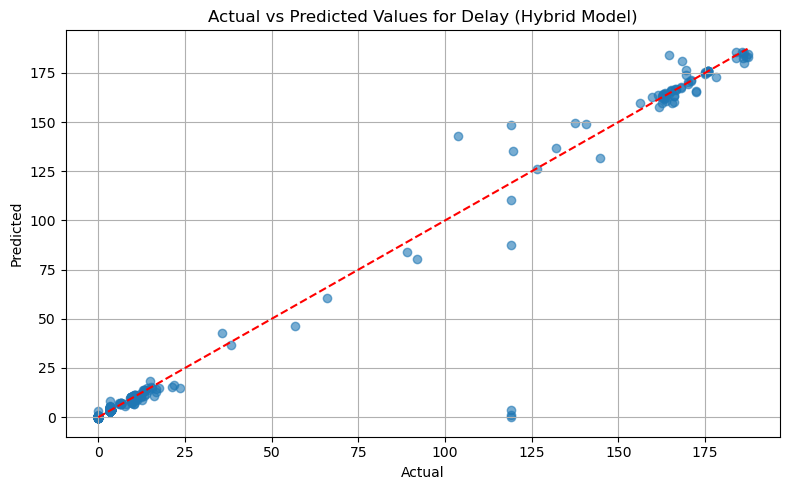

In [8]:
# Visualize actual vs predicted values to assess model accuracy

plt.figure(figsize=(8, 5))
plt.scatter(y_test, hybrid_preds, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Delay (Hybrid Model)')
plt.grid()
plt.tight_layout()
plt.show()